In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, auc
import optuna
import time

In [4]:
clinvar_anno = pd.read_csv("./clinvar_20240730_chr1_gene_dbNSFP.hg38_multianno.txt",sep='\t')

In [33]:
clinvar_anno

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,...,SiPhy_29way_logOdds_rankscore,bStatistic,bStatistic_converted_rankscore,Interpro_domain,GTEx_V8_eQTL_gene,GTEx_V8_eQTL_tissue,GTEx_V8_sQTL_gene,GTEx_V8_sQTL_tissue,eQTLGen_snp_id,Otherinfo1
0,1,69134,69134,A,G,exonic,OR4F5,.,nonsynonymous SNV,OR4F5:NM_001005484:exon1:c.A44G:p.E15G,...,0.32369,994,0.00715,.;.,.,.,.,.,.,Likely_benign
1,1,69314,69314,T,G,exonic,OR4F5,.,nonsynonymous SNV,OR4F5:NM_001005484:exon1:c.T224G:p.I75S,...,0.17765,994,0.00715,"GPCR, rhodopsin-like, 7TM;GPCR, rhodopsin-like...",.,.,.,.,.,Uncertain_significance
2,1,69423,69423,G,A,exonic,OR4F5,.,nonsynonymous SNV,OR4F5:NM_001005484:exon1:c.G333A:p.M111I,...,0.45461,994,0.00715,"GPCR, rhodopsin-like, 7TM;GPCR, rhodopsin-like...",.,.,.,.,.,Uncertain_significance
3,1,69581,69581,C,G,exonic,OR4F5,.,nonsynonymous SNV,OR4F5:NM_001005484:exon1:c.C491G:p.P164R,...,0.45461,994,0.00715,"GPCR, rhodopsin-like, 7TM;GPCR, rhodopsin-like...",.,.,.,.,.,Uncertain_significance
4,1,69682,69682,G,A,exonic,OR4F5,.,nonsynonymous SNV,OR4F5:NM_001005484:exon1:c.G592A:p.V198M,...,0.25151,994,0.00715,"GPCR, rhodopsin-like, 7TM;GPCR, rhodopsin-like...",.,.,.,.,.,Uncertain_significance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256277,1,248917999,248917999,A,G,exonic,PGBD2,.,nonsynonymous SNV,"PGBD2:NM_001017434:exon3:c.A662G:p.K221R,PGBD2...",...,0.13208,.,.,PiggyBac transposable element-derived protein;...,.,.,.,.,.,Uncertain_significance
256278,1,248918022,248918022,A,T,exonic,PGBD2,.,nonsynonymous SNV,"PGBD2:NM_001017434:exon3:c.A685T:p.M229L,PGBD2...",...,0.34381,.,.,PiggyBac transposable element-derived protein;...,.,.,.,.,.,Uncertain_significance
256279,1,248918194,248918194,G,A,exonic,PGBD2,.,nonsynonymous SNV,"PGBD2:NM_001017434:exon3:c.G857A:p.R286Q,PGBD2...",...,0.20419,.,.,.;.,.,.,.,.,.,Uncertain_significance
256280,1,248918214,248918214,G,C,exonic,PGBD2,.,nonsynonymous SNV,"PGBD2:NM_001017434:exon3:c.G877C:p.E293Q,PGBD2...",...,0.42193,.,.,.;.,.,.,.,.,.,Uncertain_significance


In [6]:
clinvar_anno_missense = clinvar_anno[clinvar_anno['ExonicFunc.refGene'] == 'nonsynonymous SNV']

In [7]:
clinvar_anno_missense

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,...,SiPhy_29way_logOdds_rankscore,bStatistic,bStatistic_converted_rankscore,Interpro_domain,GTEx_V8_eQTL_gene,GTEx_V8_eQTL_tissue,GTEx_V8_sQTL_gene,GTEx_V8_sQTL_tissue,eQTLGen_snp_id,Otherinfo1
0,1,69134,69134,A,G,exonic,OR4F5,.,nonsynonymous SNV,OR4F5:NM_001005484:exon1:c.A44G:p.E15G,...,0.32369,994,0.00715,.;.,.,.,.,.,.,Likely_benign
1,1,69314,69314,T,G,exonic,OR4F5,.,nonsynonymous SNV,OR4F5:NM_001005484:exon1:c.T224G:p.I75S,...,0.17765,994,0.00715,"GPCR, rhodopsin-like, 7TM;GPCR, rhodopsin-like...",.,.,.,.,.,Uncertain_significance
2,1,69423,69423,G,A,exonic,OR4F5,.,nonsynonymous SNV,OR4F5:NM_001005484:exon1:c.G333A:p.M111I,...,0.45461,994,0.00715,"GPCR, rhodopsin-like, 7TM;GPCR, rhodopsin-like...",.,.,.,.,.,Uncertain_significance
3,1,69581,69581,C,G,exonic,OR4F5,.,nonsynonymous SNV,OR4F5:NM_001005484:exon1:c.C491G:p.P164R,...,0.45461,994,0.00715,"GPCR, rhodopsin-like, 7TM;GPCR, rhodopsin-like...",.,.,.,.,.,Uncertain_significance
4,1,69682,69682,G,A,exonic,OR4F5,.,nonsynonymous SNV,OR4F5:NM_001005484:exon1:c.G592A:p.V198M,...,0.25151,994,0.00715,"GPCR, rhodopsin-like, 7TM;GPCR, rhodopsin-like...",.,.,.,.,.,Uncertain_significance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256277,1,248917999,248917999,A,G,exonic,PGBD2,.,nonsynonymous SNV,"PGBD2:NM_001017434:exon3:c.A662G:p.K221R,PGBD2...",...,0.13208,.,.,PiggyBac transposable element-derived protein;...,.,.,.,.,.,Uncertain_significance
256278,1,248918022,248918022,A,T,exonic,PGBD2,.,nonsynonymous SNV,"PGBD2:NM_001017434:exon3:c.A685T:p.M229L,PGBD2...",...,0.34381,.,.,PiggyBac transposable element-derived protein;...,.,.,.,.,.,Uncertain_significance
256279,1,248918194,248918194,G,A,exonic,PGBD2,.,nonsynonymous SNV,"PGBD2:NM_001017434:exon3:c.G857A:p.R286Q,PGBD2...",...,0.20419,.,.,.;.,.,.,.,.,.,Uncertain_significance
256280,1,248918214,248918214,G,C,exonic,PGBD2,.,nonsynonymous SNV,"PGBD2:NM_001017434:exon3:c.G877C:p.E293Q,PGBD2...",...,0.42193,.,.,.;.,.,.,.,.,.,Uncertain_significance


In [8]:
clinvar_anno_missense_6classees = clinvar_anno_missense[clinvar_anno_missense['Otherinfo1'].isin(["Likely_benign","Benign","Likely_pathogenic","Pathogenic","Uncertain_significance"])]

In [9]:
clinvar_anno_missense_6classees

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,...,SiPhy_29way_logOdds_rankscore,bStatistic,bStatistic_converted_rankscore,Interpro_domain,GTEx_V8_eQTL_gene,GTEx_V8_eQTL_tissue,GTEx_V8_sQTL_gene,GTEx_V8_sQTL_tissue,eQTLGen_snp_id,Otherinfo1
0,1,69134,69134,A,G,exonic,OR4F5,.,nonsynonymous SNV,OR4F5:NM_001005484:exon1:c.A44G:p.E15G,...,0.32369,994,0.00715,.;.,.,.,.,.,.,Likely_benign
1,1,69314,69314,T,G,exonic,OR4F5,.,nonsynonymous SNV,OR4F5:NM_001005484:exon1:c.T224G:p.I75S,...,0.17765,994,0.00715,"GPCR, rhodopsin-like, 7TM;GPCR, rhodopsin-like...",.,.,.,.,.,Uncertain_significance
2,1,69423,69423,G,A,exonic,OR4F5,.,nonsynonymous SNV,OR4F5:NM_001005484:exon1:c.G333A:p.M111I,...,0.45461,994,0.00715,"GPCR, rhodopsin-like, 7TM;GPCR, rhodopsin-like...",.,.,.,.,.,Uncertain_significance
3,1,69581,69581,C,G,exonic,OR4F5,.,nonsynonymous SNV,OR4F5:NM_001005484:exon1:c.C491G:p.P164R,...,0.45461,994,0.00715,"GPCR, rhodopsin-like, 7TM;GPCR, rhodopsin-like...",.,.,.,.,.,Uncertain_significance
4,1,69682,69682,G,A,exonic,OR4F5,.,nonsynonymous SNV,OR4F5:NM_001005484:exon1:c.G592A:p.V198M,...,0.25151,994,0.00715,"GPCR, rhodopsin-like, 7TM;GPCR, rhodopsin-like...",.,.,.,.,.,Uncertain_significance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256277,1,248917999,248917999,A,G,exonic,PGBD2,.,nonsynonymous SNV,"PGBD2:NM_001017434:exon3:c.A662G:p.K221R,PGBD2...",...,0.13208,.,.,PiggyBac transposable element-derived protein;...,.,.,.,.,.,Uncertain_significance
256278,1,248918022,248918022,A,T,exonic,PGBD2,.,nonsynonymous SNV,"PGBD2:NM_001017434:exon3:c.A685T:p.M229L,PGBD2...",...,0.34381,.,.,PiggyBac transposable element-derived protein;...,.,.,.,.,.,Uncertain_significance
256279,1,248918194,248918194,G,A,exonic,PGBD2,.,nonsynonymous SNV,"PGBD2:NM_001017434:exon3:c.G857A:p.R286Q,PGBD2...",...,0.20419,.,.,.;.,.,.,.,.,.,Uncertain_significance
256280,1,248918214,248918214,G,C,exonic,PGBD2,.,nonsynonymous SNV,"PGBD2:NM_001017434:exon3:c.G877C:p.E293Q,PGBD2...",...,0.42193,.,.,.;.,.,.,.,.,.,Uncertain_significance


In [11]:
plt.rcParams['font.family'] = 'DejaVu Sans'

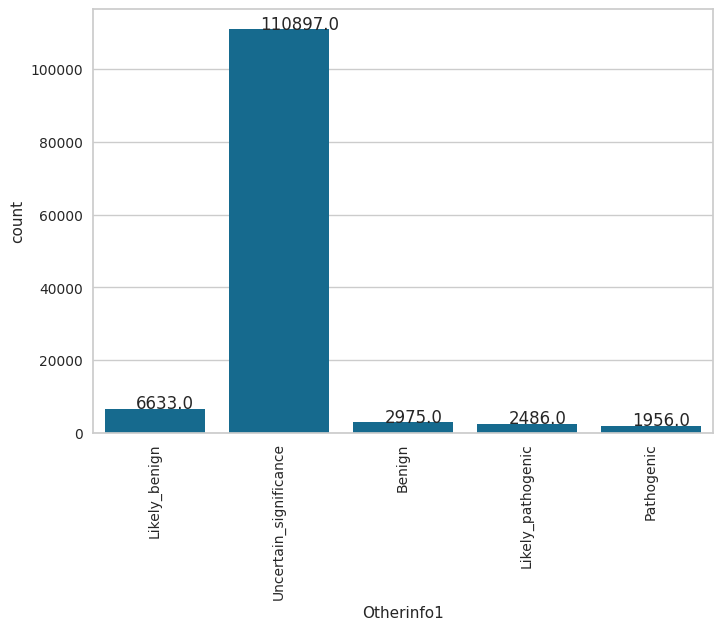

In [12]:
plt.clf()
ax = sns.countplot(x='Otherinfo1', data=clinvar_anno_missense_6classees)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
plt.show()

In [13]:
clinvar_anno_missense_b_p  = clinvar_anno_missense[clinvar_anno_missense['Otherinfo1'].isin(['Benign','Pathogenic'])]

In [14]:
clinvar_anno_missense_b_p

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,...,SiPhy_29way_logOdds_rankscore,bStatistic,bStatistic_converted_rankscore,Interpro_domain,GTEx_V8_eQTL_gene,GTEx_V8_eQTL_tissue,GTEx_V8_sQTL_gene,GTEx_V8_sQTL_tissue,eQTLGen_snp_id,Otherinfo1
32,1,930165,930165,G,A,exonic,SAMD11,.,nonsynonymous SNV,"SAMD11:NM_001385640:exon3:c.G620A:p.R207Q,SAMD...",...,0.84127,940,0.13648,.;.;.;.;.;.;.;.;.;.;.,.,.,.,.,.,Benign
43,1,930204,930204,G,A,exonic,SAMD11,.,nonsynonymous SNV,"SAMD11:NM_001385640:exon3:c.G659A:p.R220Q,SAMD...",...,0.86010,940,0.13648,.;.;.;.;.;.;.;.;.;.;.,.,.,.,.,.,Benign
73,1,930285,930285,G,A,exonic,SAMD11,.,nonsynonymous SNV,"SAMD11:NM_001385640:exon3:c.G740A:p.R247Q,SAMD...",...,0.26537,940,0.13648,.;.;.;.;.;.;.;.;.;.;.,.,.,.,.,.,Benign
78,1,930314,930314,C,T,exonic,SAMD11,.,nonsynonymous SNV,"SAMD11:NM_001385640:exon3:c.C769T:p.H257Y,SAMD...",...,0.86420,940,0.13648,.;.;.;.;.;.;.;.;.;.;.,.,.,.,.,.,Benign
281,1,939429,939429,G,C,exonic,SAMD11,.,nonsynonymous SNV,SAMD11:NM_152486:exon7:c.G675C:p.W225C,...,0.13079,940,0.13648,.;.;.,.,.,.,.,.,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255720,1,248180689,248180689,G,A,exonic,OR2M2,.,nonsynonymous SNV,OR2M2:NM_001004688:exon1:c.G704A:p.C235Y,...,0.19535,976,0.04745,"GPCR, rhodopsin-like, 7TM;GPCR, rhodopsin-like...",LYPD8,Colon_Transverse,.,.,.,Benign
255789,1,248273336,248273336,A,G,exonic,OR2T33,.,nonsynonymous SNV,OR2T33:NM_001004695:exon1:c.T479C:p.V160A,...,0.17770,982,0.03397,"GPCR, rhodopsin-like, 7TM;GPCR, rhodopsin-like...",.,.,.,.,.,Benign
255943,1,248453107,248453107,C,T,exonic,OR2T2,.,nonsynonymous SNV,OR2T2:NM_001004136:exon1:c.C310T:p.L104F,...,0.30282,982,0.03397,"GPCR, rhodopsin-like, 7TM;GPCR, rhodopsin-like...",.,.,.,.,.,Benign
255944,1,248453117,248453117,C,A,exonic,OR2T2,.,nonsynonymous SNV,OR2T2:NM_001004136:exon1:c.C320A:p.T107N,...,0.16203,982,0.03397,"GPCR, rhodopsin-like, 7TM;GPCR, rhodopsin-like...",.,.,.,.,.,Benign


In [15]:
TP = len(clinvar_anno_missense[(clinvar_anno_missense['MetaSVM_pred'] == 'D') & (clinvar_anno_missense['Otherinfo1'] == 'Pathogenic')])
TN = len(clinvar_anno_missense[(clinvar_anno_missense['MetaSVM_pred'] == 'T') & (clinvar_anno_missense['Otherinfo1'] == 'Benign')])
FP = len(clinvar_anno_missense[(clinvar_anno_missense['MetaSVM_pred'] == 'D') & (clinvar_anno_missense['Otherinfo1'] == 'Benign')])
FN = len(clinvar_anno_missense[(clinvar_anno_missense['MetaSVM_pred'] == 'T') & (clinvar_anno_missense['Otherinfo1'] == 'Pathogenic')])

# Calculate the metrics
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
ppv = TP / (TP + FP) if (TP + FP) > 0 else 0

# Display the results
metrics = {
    'Sensitivity': sensitivity,
    'Specificity': specificity,
    'Accuracy': accuracy,
    'PPV': ppv
}

metrics

{'Sensitivity': 0.791967044284243,
 'Specificity': 0.9130583020797818,
 'Accuracy': 0.8648205128205129,
 'PPV': 0.8577802565532627}

In [16]:
#MetaSVM_score, MetaLR_score, CADD_raw, VEST4_score, REVEL_score
clinvar_anno_missense_b_p_5methods = clinvar_anno_missense_b_p[['MetaSVM_score','MetaLR_score','CADD_raw','VEST4_score','REVEL_score','Otherinfo1']]

In [17]:
clinvar_anno_missense_b_p_5methods

,MetaSVM_score,MetaLR_score,CADD_raw,VEST4_score,REVEL_score,Otherinfo1
32,-0.6569,0.171,5.525143,0.612,0.257,Benign
43,-0.7940,0.058,2.912965,0.26,0.208,Benign
73,-1.0382,0.061,0.279046,0.17,0.022,Benign
78,-1.0840,0.001,2.850487,0.329,0.103,Benign
281,-1.0338,0.023,0.126376,0.337,0.088,Benign
...,...,...,...,...,...,...
255720,-1.0548,0.000,-0.364075,0.041,0.050,Benign
255789,-1.0285,0.000,-0.281976,0.056,0.017,Benign
255943,-1.0175,0.001,1.322232,0.059,0.014,Benign
255944,-0.9628,0.001,3.092159,0.158,0.084,Benign


In [18]:
# Replace '.' with NaN
clinvar_anno_missense_b_p_5methods.replace('.', np.nan, inplace=True)

In [20]:
clinvar_anno_missense_b_p_5methods_cleaned = clinvar_anno_missense_b_p_5methods.dropna()

In [21]:
clinvar_anno_missense_b_p_5methods_cleaned

,MetaSVM_score,MetaLR_score,CADD_raw,VEST4_score,REVEL_score,Otherinfo1
32,-0.6569,0.171,5.525143,0.612,0.257,Benign
43,-0.7940,0.058,2.912965,0.26,0.208,Benign
73,-1.0382,0.061,0.279046,0.17,0.022,Benign
78,-1.0840,0.001,2.850487,0.329,0.103,Benign
281,-1.0338,0.023,0.126376,0.337,0.088,Benign
...,...,...,...,...,...,...
255719,-1.0200,0.000,-0.423414,0.009,0.020,Benign
255720,-1.0548,0.000,-0.364075,0.041,0.050,Benign
255789,-1.0285,0.000,-0.281976,0.056,0.017,Benign
255943,-1.0175,0.001,1.322232,0.059,0.014,Benign


In [22]:
X = clinvar_anno_missense_b_p_5methods_cleaned.drop(columns=['Otherinfo1'])
y = clinvar_anno_missense_b_p_5methods_cleaned['Otherinfo1']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
# Display the ratio of classes in the original, training, and test sets
print("Original class distribution:")
print(y.value_counts(normalize=True))

print("\nTraining set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))

Original class distribution:
Otherinfo1
Benign        0.599211
Pathogenic    0.400789
Name: proportion, dtype: float64

Training set class distribution:
Otherinfo1
Benign        0.599118
Pathogenic    0.400882
Name: proportion, dtype: float64

Test set class distribution:
Otherinfo1
Benign        0.599585
Pathogenic    0.400415
Name: proportion, dtype: float64


In [31]:
def objective(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    
    # Initialize the Random Forest model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model using cross-validation
    accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy').mean()
    
    return accuracy

In [33]:
# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Display the best hyperparameters
print(f'Best hyperparameters: {study.best_params}')

[I 2024-08-10 22:47:31,011] A new study created in memory with name: no-name-d1176281-fa2b-4ddc-baee-2dece46a9fc8
[I 2024-08-10 22:47:54,101] Trial 0 finished with value: 0.9151483749411209 and parameters: {'n_estimators': 226, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9151483749411209.
[I 2024-08-10 22:48:25,035] Trial 1 finished with value: 0.9141100868043871 and parameters: {'n_estimators': 333, 'max_depth': 48, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9151483749411209.
[I 2024-08-10 22:49:53,610] Trial 2 finished with value: 0.9156692012650561 and parameters: {'n_estimators': 881, 'max_depth': 32, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.9156692012650561.
[I 2024-08-10 22:50:32,495] Trial 3 finished with value: 0.9151470291366663 and parameters: {'n_estimators': 429, 'max_depth': 12, 'm

Best hyperparameters: {'n_estimators': 218, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': 'sqrt'}


In [34]:
#Train the Final Model
# Retrieve the best hyperparameters
best_params = study.best_params

# Initialize the Random Forest model with the best hyperparameters
best_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# Train the model on the entire training set
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=9, min_samples_split=8,
                       n_estimators=218, random_state=42)

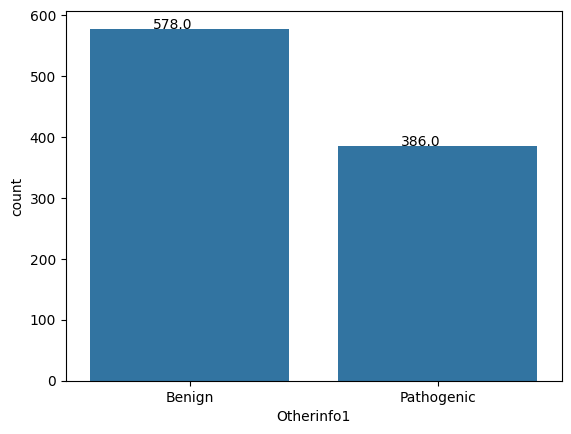

In [36]:
plt.clf()
ax = sns.countplot(x='Otherinfo1', data=pd.DataFrame(y_test))

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    
plt.show()

In [37]:
pd.DataFrame(y_test)

,Otherinfo1
221028,Benign
30207,Pathogenic
206488,Benign
164977,Benign
109091,Pathogenic
...,...
251281,Benign
220329,Benign
147961,Pathogenic
63625,Benign


In [38]:
#Evaluate the Model
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9304979253112033
Confusion Matrix:
[[551  27]
 [ 40 346]]
Classification Report:
              precision    recall  f1-score   support

      Benign       0.93      0.95      0.94       578
  Pathogenic       0.93      0.90      0.91       386

    accuracy                           0.93       964
   macro avg       0.93      0.92      0.93       964
weighted avg       0.93      0.93      0.93       964



In [39]:
TP = 346
TN = 550
FP = 28
FN = 40
# Calculate the metrics
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
ppv = TP / (TP + FP) if (TP + FP) > 0 else 0

# Calculate F1-score
f1_score = 2 * (ppv * sensitivity) / (ppv + sensitivity) if (ppv + sensitivity) > 0 else 0

# Display the results
metrics = {
    'Sensitivity': sensitivity,
    'Specificity': specificity,
    'Accuracy': accuracy,
    'PPV': ppv,
    'F1-score': f1_score
}

metrics

{'Sensitivity': 0.8963730569948186,
 'Specificity': 0.9515570934256056,
 'Accuracy': 0.9294605809128631,
 'PPV': 0.9251336898395722,
 'F1-score': 0.9105263157894736}

In [41]:
# Make probability predictions on the test set
y_prob = best_model.predict_proba(X_test)[:, 1]  # Assuming binary classification and extracting the probability for class 1

In [45]:
# Calculate AUROC
auroc = roc_auc_score(y_test, y_prob)
print(f'AUROC: {auroc}')

AUROC: 0.9694049518618786


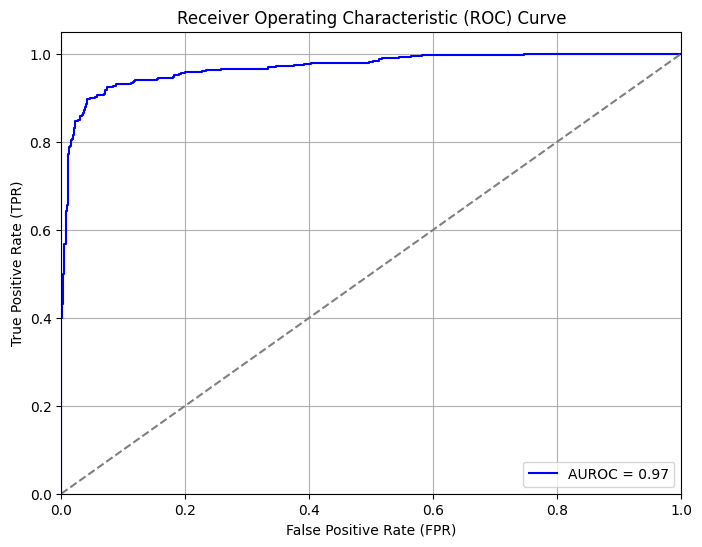

In [48]:
# Convert categorical labels to binary (0 and 1)
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUROC = {auroc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [55]:
feature_names = X_test.columns.tolist()
start_time = time.time()
result = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 2.371 seconds


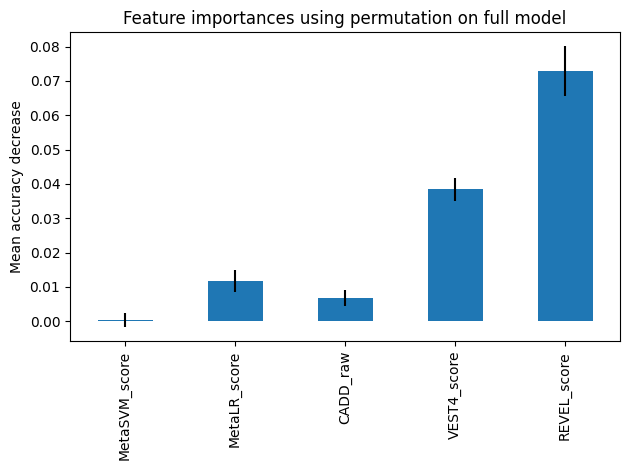

In [56]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [24]:
clinvar_anno_missense_b_p_5methods

,MetaSVM_score,MetaLR_score,CADD_raw,VEST4_score,REVEL_score,Otherinfo1
32,-0.6569,0.171,5.525143,0.612,0.257,Benign
43,-0.7940,0.058,2.912965,0.26,0.208,Benign
73,-1.0382,0.061,0.279046,0.17,0.022,Benign
78,-1.0840,0.001,2.850487,0.329,0.103,Benign
281,-1.0338,0.023,0.126376,0.337,0.088,Benign
...,...,...,...,...,...,...
255720,-1.0548,0.000,-0.364075,0.041,0.050,Benign
255789,-1.0285,0.000,-0.281976,0.056,0.017,Benign
255943,-1.0175,0.001,1.322232,0.059,0.014,Benign
255944,-0.9628,0.001,3.092159,0.158,0.084,Benign


In [1]:
from pycaret.classification import *

In [35]:
s = setup(data = clinvar_anno_missense_b_p_5methods,
          train_size = 0.8,
          target = 'Otherinfo1',
          imputation_type = 'simple',
          session_id = 123,
          normalize = True)

,Description,Value
0,Session id,123
1,Target,Otherinfo1
2,Target type,Binary
3,Target mapping,"Benign: 0, Pathogenic: 1"
4,Original data shape,"(4931, 6)"
5,Transformed data shape,"(4931, 6)"
6,Transformed train set shape,"(3944, 6)"
7,Transformed test set shape,"(987, 6)"
8,Categorical features,5
9,Rows with missing values,2.3%


In [34]:
# check model library
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [36]:
catboost = create_model('catboost')
xgboost = create_model('xgboost')
rf = create_model('rf')
svm = create_model('rbfsvm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7899,0.9442,0.7899,0.8362,0.7913,0.5902,0.6231
1,0.6051,0.9464,0.6051,0.7614,0.4588,0.0077,0.0620
2,0.7646,0.9151,0.7646,0.8119,0.7387,0.4586,0.5277
3,0.6759,0.9270,0.6759,0.7893,0.5988,0.2145,0.3466
4,0.6041,0.9216,0.6041,0.3649,0.4550,0.0000,0.0000
5,0.7792,0.9463,0.7792,0.8251,0.7565,0.4930,0.5593
6,0.7157,0.9238,0.7157,0.7915,0.6668,0.3253,0.4283
7,0.7208,0.9225,0.7208,0.8015,0.6727,0.3373,0.4442
8,0.7259,0.9333,0.7259,0.8114,0.6787,0.3494,0.4601


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6025,0.9471,0.6025,0.3630,0.4531,0.0000,0.0000
1,0.6481,0.9486,0.6481,0.7584,0.5512,0.1372,0.2607
2,0.6633,0.9172,0.6633,0.7840,0.5764,0.1786,0.3132
3,0.6658,0.9312,0.6658,0.7850,0.5809,0.1858,0.3200
4,0.6041,0.9546,0.6041,0.3649,0.4550,0.0000,0.0000
5,0.6650,0.9517,0.6650,0.7845,0.5785,0.1801,0.3146
6,0.7030,0.9186,0.7030,0.7837,0.6472,0.2907,0.3990
7,0.7360,0.9210,0.7360,0.7979,0.6981,0.3812,0.4692
8,0.6193,0.9341,0.6193,0.7665,0.4886,0.0461,0.1536


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8835,0.9445,0.8835,0.8890,0.8844,0.7615,0.7649
1,0.6051,0.8341,0.6051,0.7614,0.4588,0.0077,0.0620
2,0.6025,0.8141,0.6025,0.3630,0.4531,0.0000,0.0000
3,0.6025,0.8632,0.6025,0.3630,0.4531,0.0000,0.0000
4,0.6041,0.8773,0.6041,0.3649,0.4550,0.0000,0.0000
5,0.6066,0.9026,0.6066,0.7618,0.4607,0.0077,0.0623
6,0.6041,0.8927,0.6041,0.3649,0.4550,0.0000,0.0000
7,0.6041,0.8954,0.6041,0.3649,0.4550,0.0000,0.0000
8,0.6041,0.8669,0.6041,0.3649,0.4550,0.0000,0.0000


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8152,0.8732,0.8152,0.8586,0.7995,0.5810,0.6399
1,0.6759,0.8479,0.6759,0.7770,0.6013,0.2164,0.3401
2,0.6127,0.8689,0.6127,0.7642,0.4757,0.0305,0.1245
3,0.6278,0.8358,0.6278,0.7699,0.5080,0.0758,0.1984
4,0.6269,0.7857,0.6269,0.7694,0.5047,0.0689,0.1889
5,0.6447,0.8876,0.6447,0.7763,0.5404,0.1213,0.2541
6,0.6117,0.8948,0.6117,0.7636,0.4721,0.0231,0.1082
7,0.6371,0.9002,0.6371,0.7733,0.5254,0.0990,0.2282
8,0.6142,0.8999,0.6142,0.7646,0.4777,0.0308,0.1251


In [37]:
evaluate_model(xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…